In [1]:
using NamedTrajectories
using Makie
using GLMakie
using PiccoloPlots

In [2]:
function animate_named_plot(traj::NamedTrajectory; name=:x, fps=30)
    fig = Figure()
    ax = Axis(fig[1, 1])

    plot_name!(ax, traj, name)  # Plots the full trajectory

    index = Observable(1)
    times = get_times(traj)
    data = traj[name]

    # Assume 1D component for simplicity
    for i in 1:size(data, 1)
        moving_dot = @lift(Point2f(times[$index], data[i, $index]))
        scatter!(ax, moving_dot, color=:red, markersize=10)
    end

    display(fig)

    @async begin
        while isopen(fig.scene)
            for t in 1:traj.T
                index[] = t
                sleep(1 / fps)
            end
        end
    end

    return fig
end


animate_named_plot (generic function with 1 method)

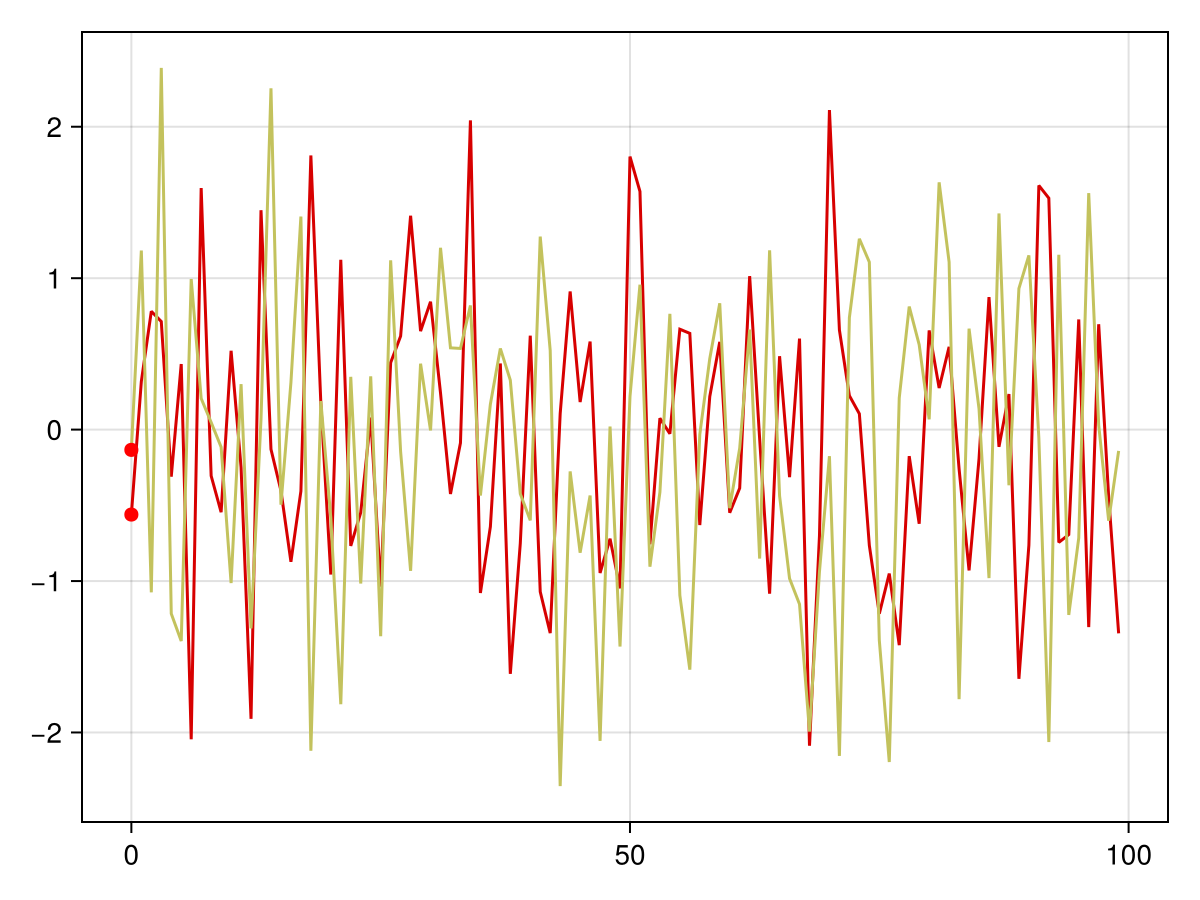

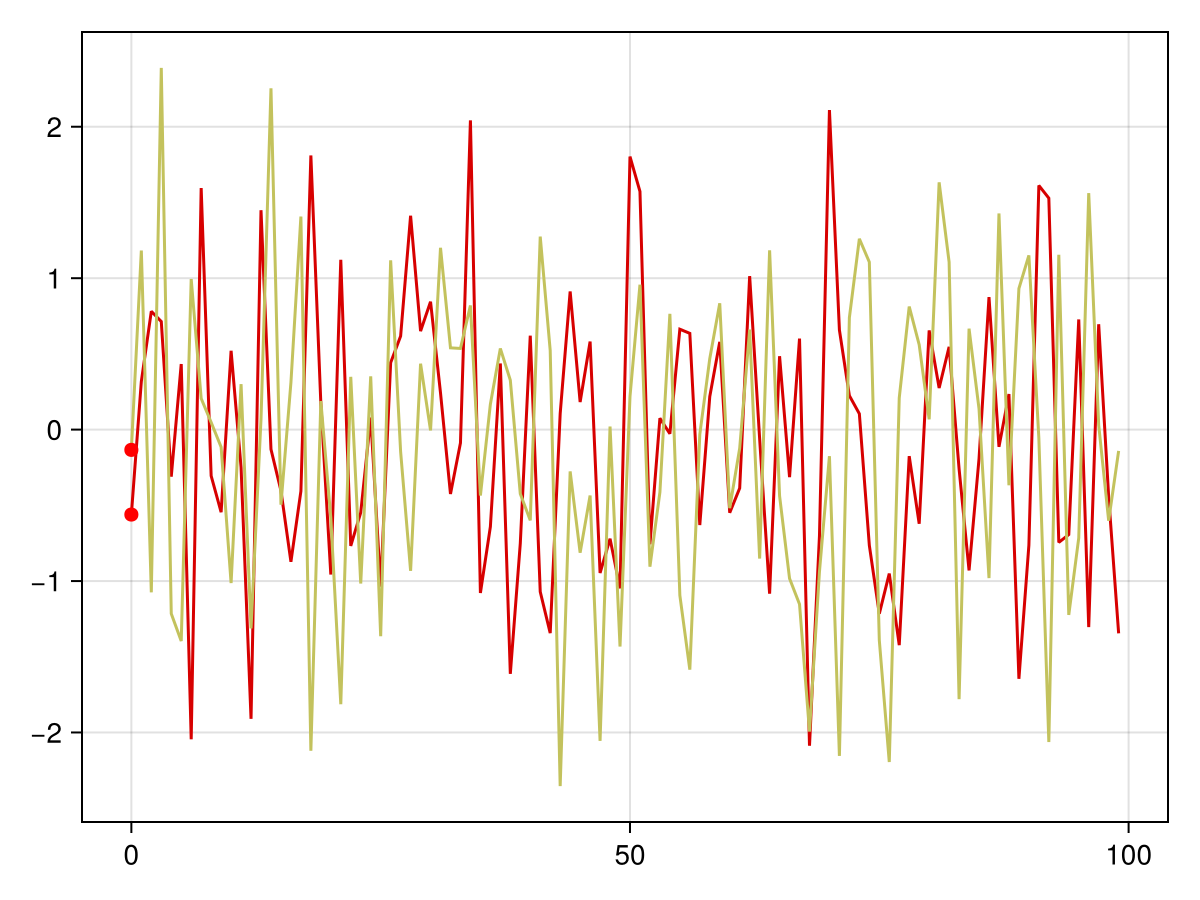

In [3]:
using NamedTrajectories

traj = rand(NamedTrajectory, 100, state_dim=2)
animate_named_plot(traj, name=:x)


In [4]:
function animate_traj_peek(traj::NamedTrajectory, name::Symbol=:x; fps=30)
    times = get_times(traj)
    values = traj[name]  # shape: (D, T)
    T = traj.T
    D = size(values, 1)

    fig = Figure()
    ax = Axis(fig[1, 1])
    plot_name!(ax, traj, name)

    index = Observable(1)

    # Animated dots using @lift to peek into known data
    for i in 1:D
        pt = @lift(Point2f(times[$index], values[i, $index]))
        scatter!(ax, pt, color=:red, markersize=12)
    end

    display(fig)

    @async begin
        while isopen(fig.scene)
            for t in 1:T
                index[] = t
                sleep(1 / fps)
            end
        end
    end

    return fig
end


animate_traj_peek (generic function with 2 methods)

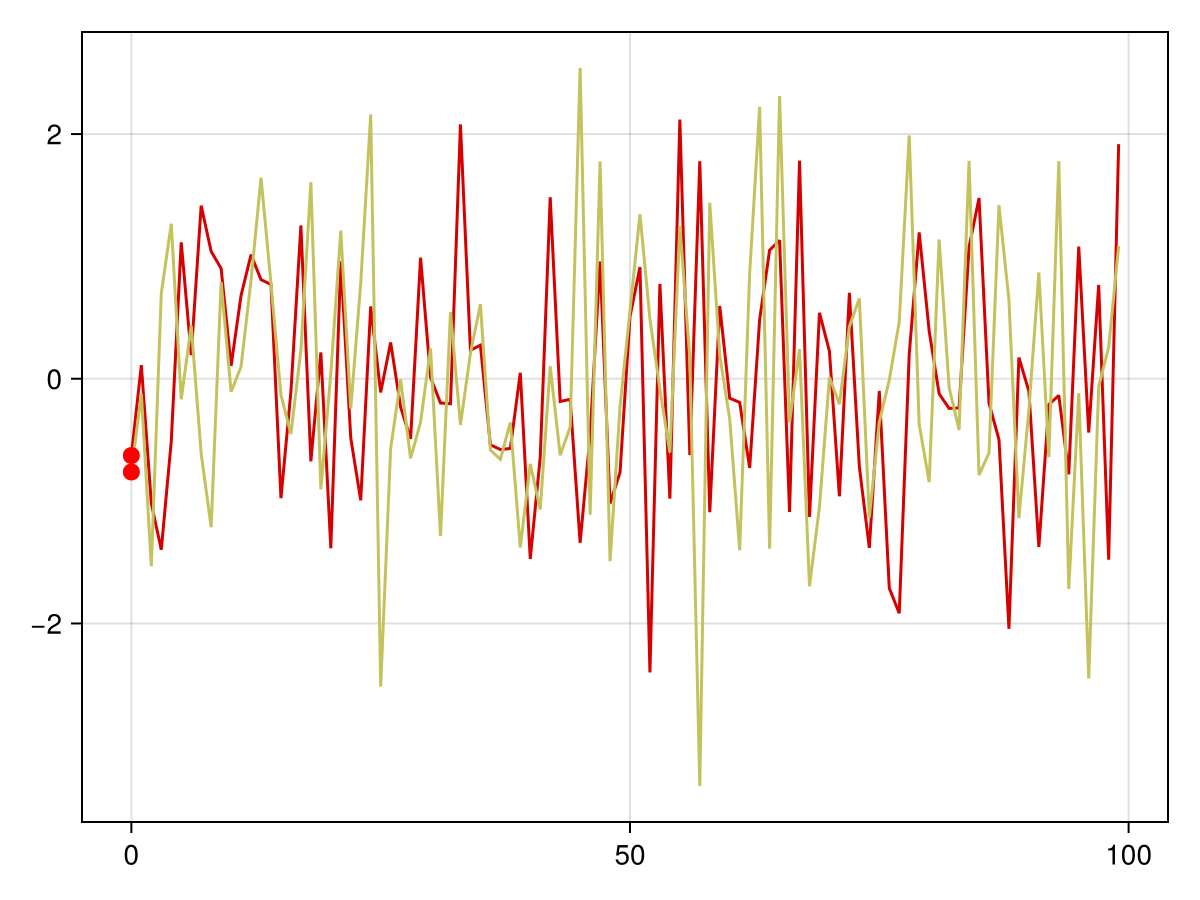

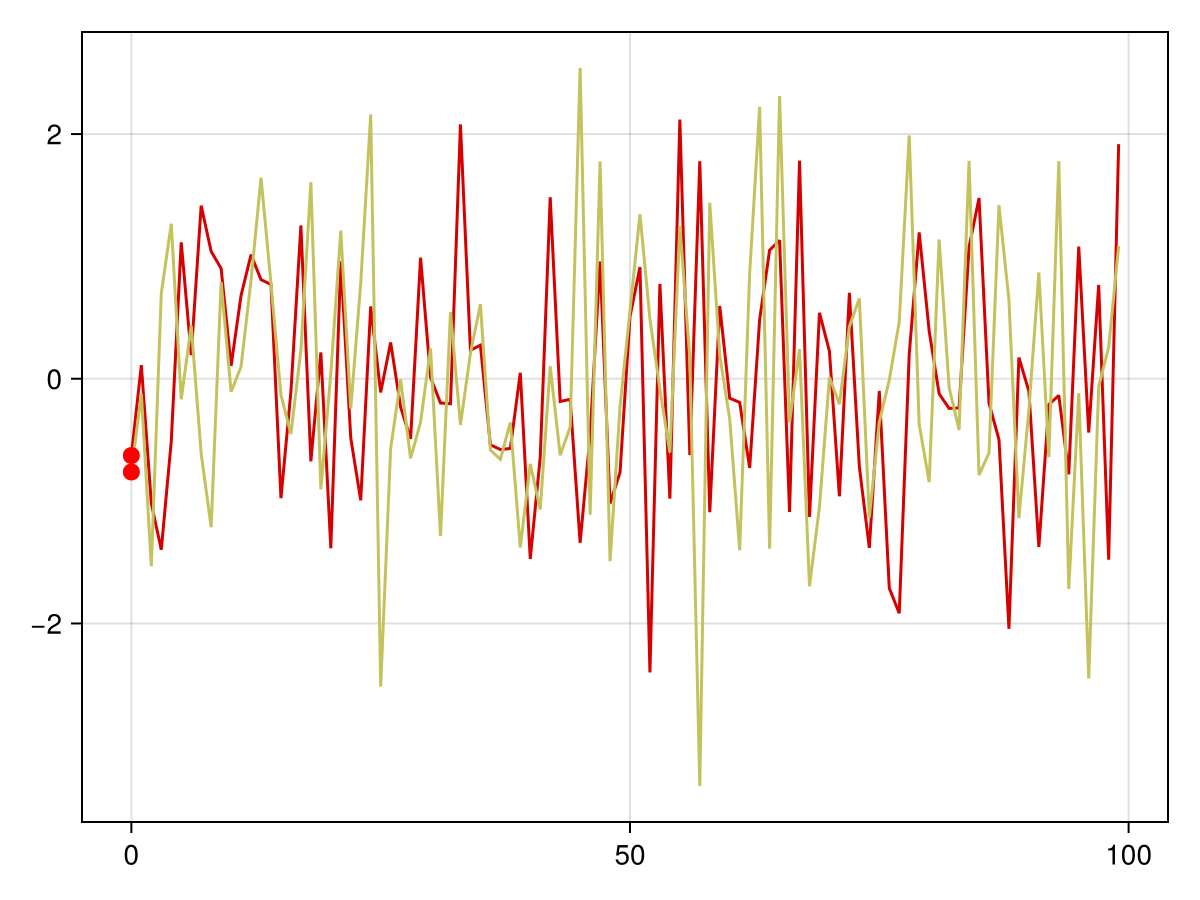

In [5]:
using NamedTrajectories, CairoMakie

traj = rand(NamedTrajectory, 100, state_dim=2)
animate_traj_peek(traj, :x)


In [7]:
using CairoMakie
using NamedTrajectories

function animate_traj_peek(traj::NamedTrajectory, name::Symbol=:x; fps=30)
    # Extract data
    values = traj[name]          # shape: (D, T)
    times = get_times(traj)      # shape: (T,)
    T = traj.T
    D = size(values, 1)

    # Set up figure
    fig = Figure()
    ax = Axis(fig[1, 1])
    plot_name!(ax, traj, name)  # plot full trajectory using your recipe

    index = Observable(1)

    # Overlay red dots for each dimension of the signal
    for i in 1:D
        scatter!(
            ax,
            @lift(Point2f(times[$index], values[$i, $index])),
            color = :red,
            markersize = 12,
        )
    end

    display(fig)

    # Animate the index forward
    @async begin
        while isopen(fig.scene)
            for t in 1:T
                index[] = t
                sleep(1 / fps)
            end
        end
    end

    return fig
end


animate_traj_peek (generic function with 2 methods)

In [8]:
traj = rand(NamedTrajectory, 100, state_dim=2)
animate_traj_peek(traj, :x)


MethodError: MethodError: no method matching length(::Observable{Int64})
The function `length` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  length(!Matched::LaTeXStrings.LaTeXString)
   @ LaTeXStrings ~/.julia/packages/LaTeXStrings/6NrIG/src/LaTeXStrings.jl:112
  length(!Matched::Base.MethodSpecializations)
   @ Base reflection.jl:1317
  length(!Matched::Attributes)
   @ MakieCore ~/.julia/packages/MakieCore/FHomX/src/attributes.jl:71
  ...
